## All Imports

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
import warnings
from pathlib import Path
RANDOM_STATE = 27
plt.style.use('bmh')
pd.set_option("display.max_columns", 100)
warnings.filterwarnings('ignore')

In [91]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,OrdinalEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, Pool, cv
   
set_config(display='diagram')

In [92]:
from ipynb.fs.full.AnalysisTools import nullInfo,nullInfoCompare, dropColumns

In [93]:
from ipynb.fs.defs.AnalysisTools import show

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.pipeline import Pipeline, make_pipeline    
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,MaxAbsScaler, OrdinalEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer

## Data Upload

In [57]:
train_features = pd.read_csv("training_value_set.csv", index_col="id")
train_labels = pd.read_csv("training_label_set.csv", index_col="id")
test_features = pd.read_csv("test_value_set.csv", index_col="id")

In [58]:
df = pd.merge(train_features, train_labels, left_index=True, right_index=True)

In [59]:
print(train_features.shape, train_labels.shape,test_features.shape)

(59400, 39) (59400, 1) (14850, 39)


In [112]:
train_features[train_features['subvillage'] == 'Mtangali']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20642,300.0,2011-03-18,St,753,St,36.749196,-7.286490,Kwa Kusila,0,Rufiji,Mtangali,Morogoro,5,1,Kilosa,Kisanga,120,1.0,GeoData Consultants Ltd,VWC,Ki,1.0,2002,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59960,0.0,2011-03-18,NaN,755,NaN,36.748121,-7.286723,Shule,0,Rufiji,Mtangali,Morogoro,5,1,Kilosa,Kisanga,150,1.0,GeoData Consultants Ltd,VWC,NaN,1.0,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
45746,300.0,2011-03-18,St,758,St,36.750226,-7.286436,Abdallah Mponzi,0,Rufiji,Mtangali,Morogoro,5,1,Kilosa,Kisanga,150,1.0,GeoData Consultants Ltd,VWC,Ki,1.0,2002,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
1860,0.0,2011-03-18,St,759,St,36.746677,-7.287607,Kwa Massawe,0,Rufiji,Mtangali,Morogoro,5,1,Kilosa,Kisanga,1,1.0,GeoData Consultants Ltd,VWC,Ki,1.0,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


In [95]:
extra = pd.read_csv("wpms_dump_13_feb_2015_refined_joined_nulls_removed.csv")

In [110]:
extra[extra['region_name'] == 'Dodoma']

,gid,objectid,valid_from,valid_to,amount_tsh,breakdown_year,date_recorded,funder,gps_height,installer,longitude,latitude,wptname,num_privcon,basin,village,subvillage,village_reg_num,region_name,lga_name,ward_name,pop_served,village_pop,public_meeting,gen_comment,reason_wpt,recorded_by,scheme_man,schemename,permit,wptcode,wptphotoid,villphotoid,construction_year,extraction,extraction_group,extraction_class,hardware_problem,hardware_problem_group,management,management_group,payment,payment_group,quality,quality_group,quantity,quantity_group,source,source_group,source_class,status,status_group,wp_type,wp_type_group,region_code,district_code,district_name,ward_code
5131,52543586,52314762,2013-08-28T00:00:00Z,2101-10-01T00:00:00Z,0.0,0.0,2011-03-13T00:00:00Z,Water,0,Commu,36.529235,-6.181133,Kwa Mdeche,0.0,Wami / Ruvu,Msingisa,NaN,NaN,Dodoma,Kongwa,Sagara,0.0,0.0,True,NaN,NaN,GeoData Consultants Ltd,VWC,Msin,False,01033086133WP03,KongDSC00114,NaN,0.0,mono,mono,motorpump,tap poorly sited,tap poorly sited,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,not functional,non functional,communal standpipe multiple,communal standpipe,1,3,Kongwa,21
5132,52543627,52314818,2013-08-28T00:00:00Z,2101-10-01T00:00:00Z,0.0,0.0,2011-03-14T00:00:00Z,Water,0,Commu,36.370652,-5.610187,Kwa Ogila,0.0,Wami / Ruvu,Chitego,NaN,NaN,Dodoma,Kongwa,Chitego,0.0,0.0,True,NaN,NaN,GeoData Consultants Ltd,VWC,Chit,False,01033086041WP21,KongDSC00166,NaN,0.0,mono,mono,motorpump,tap broken,tap broken,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,not functional,non functional,communal standpipe,communal standpipe,1,3,Kongwa,21
5133,52543506,52314792,2013-08-28T00:00:00Z,2101-10-01T00:00:00Z,0.0,0.0,2011-03-14T00:00:00Z,LVIA,0,Commu,36.408606,-5.713341,Shuleni,0.0,Wami / Ruvu,Zoissa Kinangali,NaN,DO/MP/KIJ195,Dodoma,Kongwa,Zoissa,0.0,0.0,True,NaN,NaN,GeoData Consultants Ltd,VWC,Zois,False,01033086041WP01,KongDSC00017,NaN,0.0,mono,mono,motorpump,source damaged,source damaged,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,not functional,non functional,communal standpipe multiple,communal standpipe,1,3,Kongwa,21
5134,52543507,52314794,2013-08-28T00:00:00Z,2101-10-01T00:00:00Z,0.0,0.0,2011-03-14T00:00:00Z,LVIA,0,Commu,36.407974,-5.715084,Kwa Emson,0.0,Wami / Ruvu,Zoissa Kinangali,NaN,DO/MP/KIJ195,Dodoma,Kongwa,Zoissa,0.0,0.0,True,NaN,NaN,GeoData Consultants Ltd,VWC,Zois,False,01033086041WP02,KongDSC00018,NaN,0.0,mono,mono,motorpump,source damaged,source damaged,vwc,user-group,pay per bucket,per bucket,salty,salty,dry,dry,machine dbh,borehole,groundwater,not functional,non functional,communal standpipe,communal standpipe,1,3,Kongwa,21
5135,52543508,52314640,2013-08-28T00:00:00Z,2101-10-01T00:00:00Z,0.0,0.0,2011-03-10T00:00:00Z,World Bank,0,Nice,36.343789,-6.159284,Kwa Malogo,0.0,Wami / Ruvu,Manungu,NaN,NaN,Dodoma,Kongwa,Sejeli,0.0,0.0,True,NaN,NaN,GeoData Consultants Ltd,VWC,Manu,True,01033086021WP01,KongDSC00019,NaN,0.0,submersible,submersible,submersible,none,none,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,functional,functional,communal standpipe multiple,communal standpipe,1,3,Kongwa,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,52543502,52312698,2013-08-28T00:00:00Z,2101-10-01T00:00:00Z,0.0,0.0,2011-03-30T00:00:00Z,Water,0,Commu,35.601321,-5.992266,Kwa Lizedi,0.0,Internal,Mbalawala,Chinzachi,NaN,Dodoma,Dodoma Urban,Mbalawala,0.0,0.0,True,NaN,NaN,GeoData Consultants Ltd,VWC,Mbal,False,01052003301WP25,DOMDSC00608,NaN,0.0,mono,mono,motorpump,pump broken,pump broken,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,not functional,no

In [76]:
# PPS related stuff

import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
df_smaller = pd.merge(df_train, train_labels, left_index=True, right_index=True)
matrix_train = pps.matrix(df_smaller) 


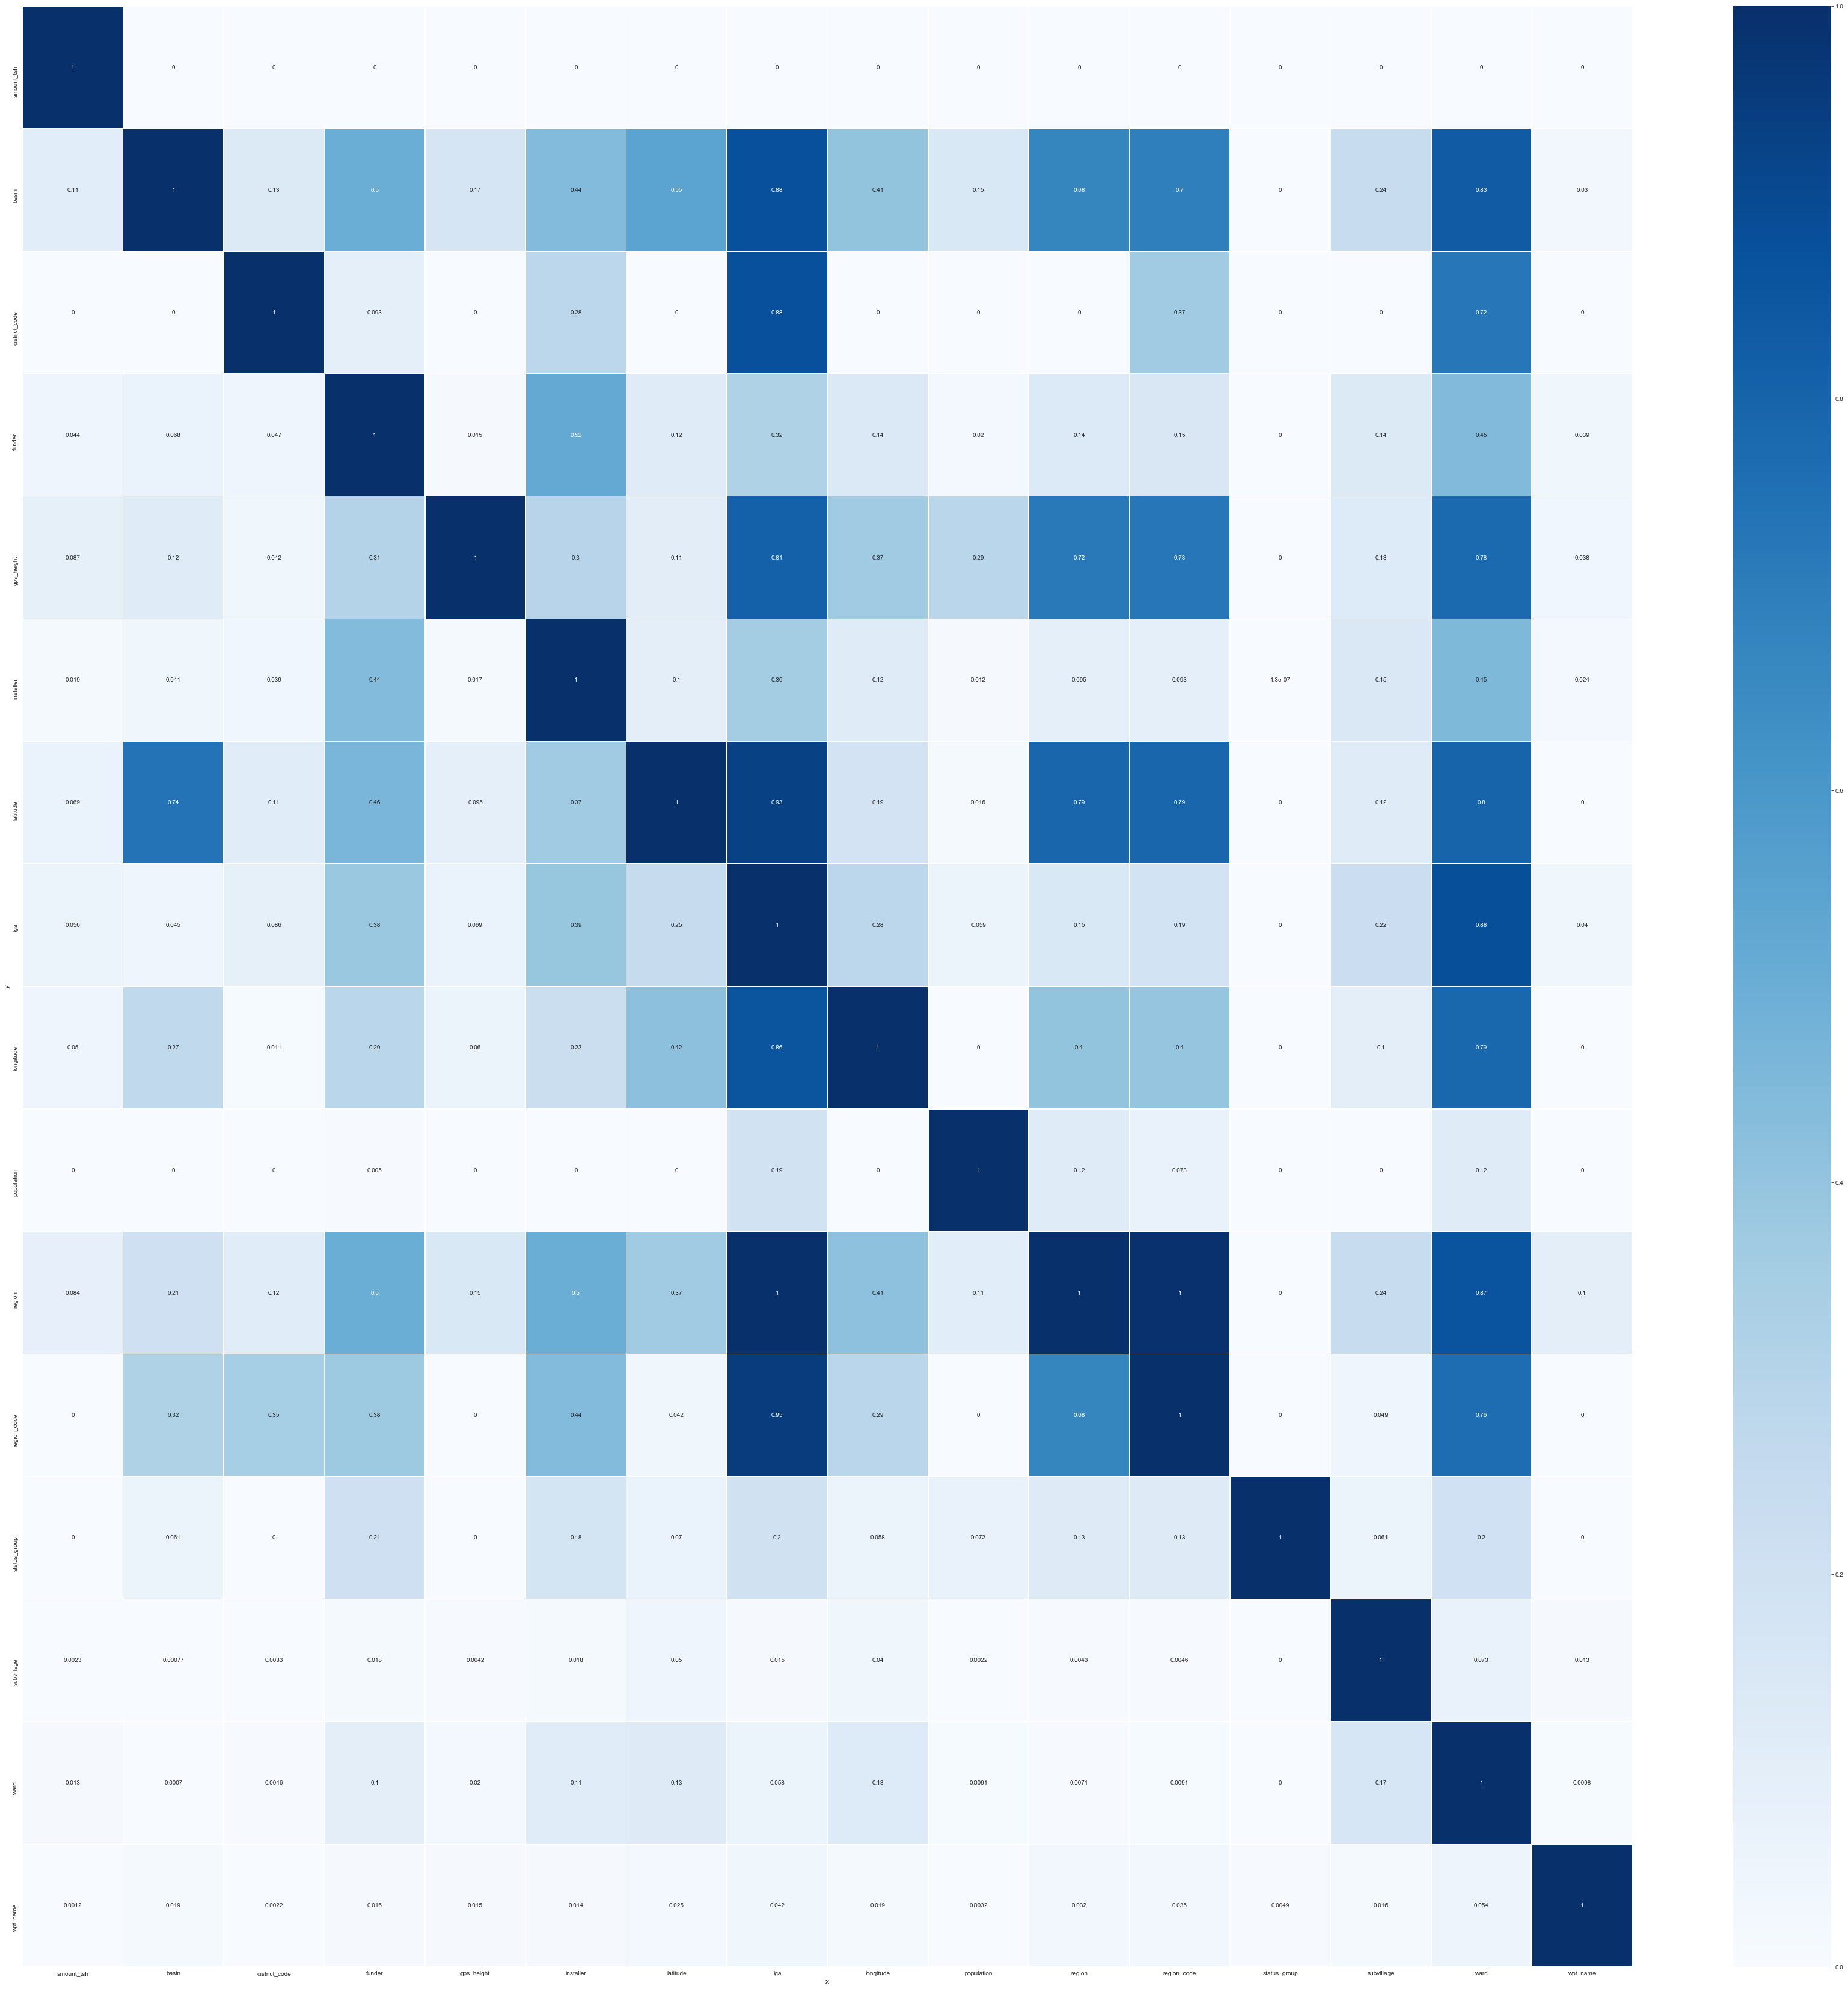

In [77]:
matrix_df = matrix_train[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (60,60))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True )

# # matrix_train = pps.matrix(train_features) 
# matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Table Modification(Based of EDA)

In [60]:
train_features['public_meeting'] = train_features['public_meeting'].replace({True: 1, False: 0})
train_features['permit'] = train_features['permit'].replace({True: 1, False: 0})

In [61]:
df_train = train_features[['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population']]
df_test = test_features[['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population']]

In [82]:
train_features[['region_code','district_code']].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [86]:
train_features['region'].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

In [89]:
train_features[train_features['district_code'] == 0].count()

amount_tsh               23
date_recorded            23
funder                   23
gps_height               23
installer                23
longitude                23
latitude                 23
wpt_name                 23
num_private              23
basin                    23
subvillage               23
region                   23
region_code              23
district_code            23
lga                      23
ward                     23
population               23
public_meeting           23
recorded_by              23
scheme_management        23
scheme_name               8
permit                   23
construction_year        23
extraction_type          23
extraction_type_group    23
extraction_type_class    23
management               23
management_group         23
payment                  23
payment_type             23
water_quality            23
quality_group            23
quantity                 23
quantity_group           23
source                   23
source_type         

In [84]:
train_features['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

In [85]:
train_features['region_code'].unique()

array([11, 20, 21, 90, 18,  4, 17, 14, 60, 10,  3, 15, 19, 16, 80,  1,  6,
        2, 12, 13,  5,  7, 99, 24,  9,  8, 40], dtype=int64)

In [ ]:
train_features[['region_code','district_code']].describe()

In [87]:
train_features[['region_code','district_code','lga']]

,region_code,district_code,lga
id,,,
69572,11,5,Ludewa
8776,20,2,Serengeti
34310,21,4,Simanjiro
67743,90,63,Nanyumbu
19728,18,1,Karagwe
...,...,...,...
60739,3,5,Hai
27263,11,4,Njombe
37057,12,7,Mbarali


## EDA

In [78]:
nullInfo(train_features)

,colName,dataType,uniqueEntries,nullEntries,nullPercentage
0,amount_tsh,float64,98,0,0.000
1,date_recorded,object,356,0,0.000
2,funder,object,1897,3635,6.120
3,gps_height,int64,2428,0,0.000
4,installer,object,2145,3655,6.153
5,longitude,float64,57516,0,0.000
6,latitude,float64,57517,0,0.000
7,wpt_name,object,37400,0,0.000
8,num_private,int64,65,0,0.000
9,basin,object,9,0,0.000


In [14]:
# nullInfo(df_train)

In [15]:
# nullInfoCompare(df_train,df_test)

In [15]:
train_labels.columns
train_features.columns
show(train_labels.columns,train_features.columns,df.columns)

Index(['status_group'], dtype='object')
Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')
Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'schem

In [34]:
df_train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000


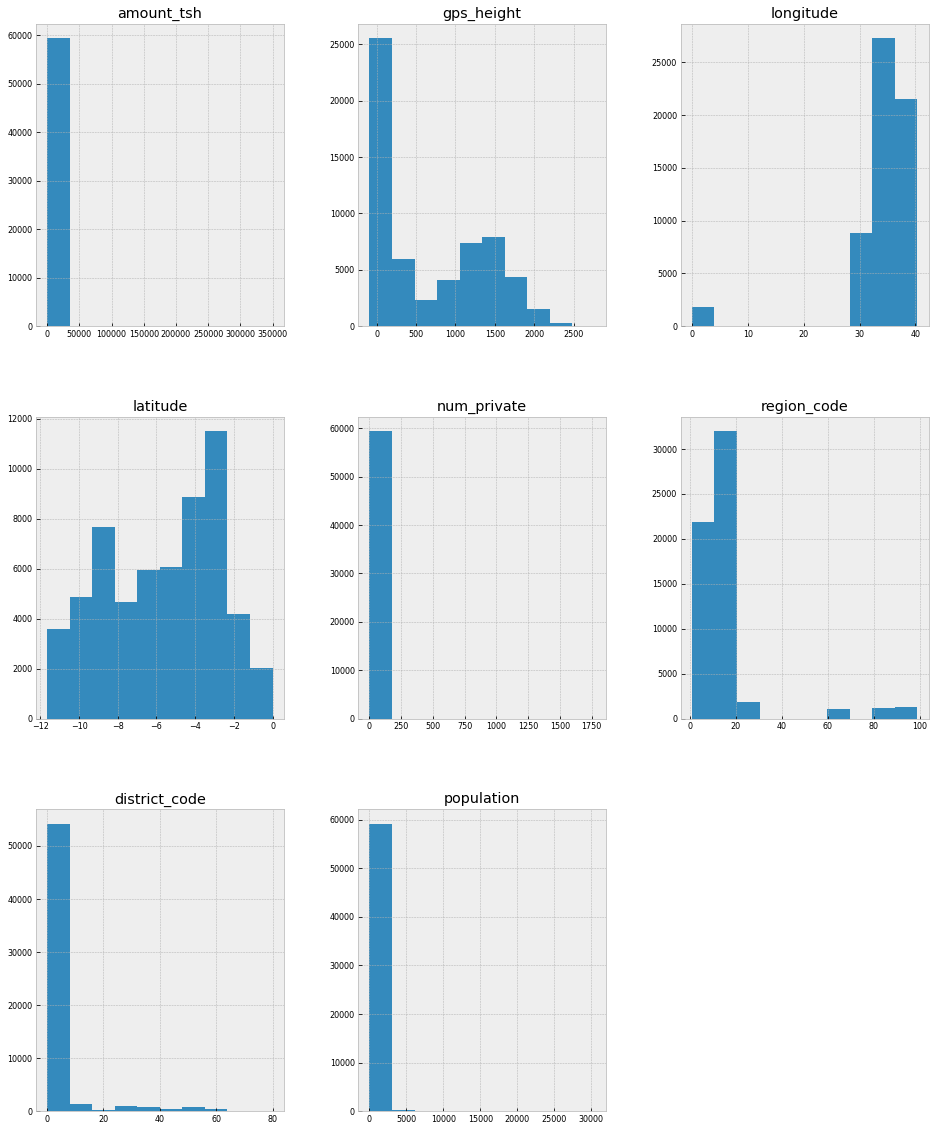

In [35]:
df_train.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);

In [ ]:
# corr = train_features.corr()
# fig, ax = plt.subplots(figsize=(14,14)) 
# sns.heatmap(corr)

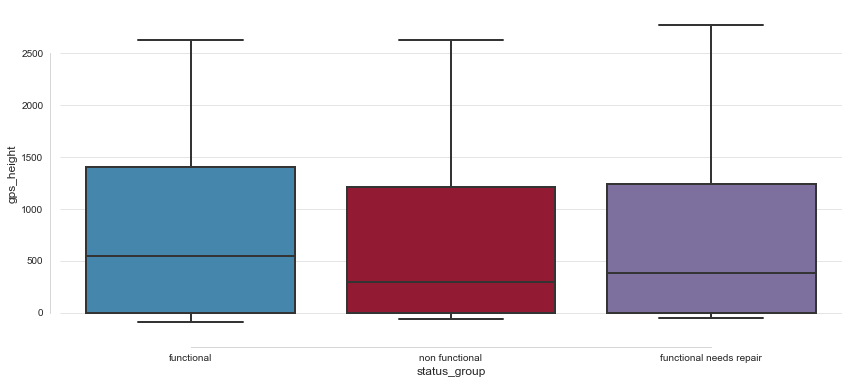

In [21]:
sns.set_style("whitegrid") 
plt.figure(figsize=(14,6))
# sns.boxplot(x = 'status_group', y = 'num_private', data = df, flierprops = dict(markerfacecolor = '0.950', markersize = 12))
sns.boxplot(x = 'status_group', y = 'gps_height', data = df, showfliers = False)
sns.despine(offset=10, trim=True)

In [ ]:
# removeCol = ['date_recorded','recorded_by','longitude','latitude',
#                 'source', 'source_type','source_class','extraction_type',
#                     extraction_type_group','extraction_type_class']
# dropColumns(train_features,colArr=removeCol,per=10,names=False)
# dropColumns(test_features,colArr=removeCol,per=10,names=False)

In [62]:
colArr = ['date_recorded','num_private']
df_train.drop(columns=colArr,inplace=True)
df_test.drop(columns=colArr,inplace=True)

numeric_cols = df_train.columns[df_train.dtypes != "object"].values
object_cols = df_train.columns[df_train.dtypes == "object"].values

# For Catboost
df_train[object_cols] = df_train[object_cols].fillna('None')
df_test[object_cols] = df_test[object_cols].fillna('None')

In [22]:
colArr = ['date_recorded','recorded_by','num_private']
train_features.drop(columns=colArr,inplace=True)
test_features.drop(columns=colArr,inplace=True)

KeyError: "['date_recorded' 'recorded_by' 'num_private'] not found in axis"

In [ ]:
# train_features = train_features[object_cols].fillna('None')

In [17]:
# cat_columns = train_features.select_dtypes(include=['object']).columns.to_list()
# for col in cat_columns:
# #     if train_features[col].nunique() >= 20:
#     train_features[col] = train_features[col].astype('category')
#     train_features[col] = train_features[col].cat.codes
#     test_features[col] = test_features[col].astype('category')
#     test_features[col] = test_features[col].cat.codes

## Modelling

In [23]:
numeric_cols = train_features.columns[train_features.dtypes != "object"].values
object_cols = train_features.columns[train_features.dtypes == "object"].values

In [24]:
# For Catboost
train_features[object_cols] = train_features[object_cols].fillna('None')
test_features[object_cols] = test_features[object_cols].fillna('None')

In [63]:
X = train_features
y = train_labels 

X = df_train
y = train_labels 

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.20,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_STATE
) 

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=200,max_depth=1000, random_state=0,n_jobs=5)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
accuracy_score(y_test, rf_predictions)

In [69]:
train_pool = Pool(data=X_train, label=y_train, cat_features=object_cols)
test_pool = Pool(data=X_val, label=y_val, cat_features=object_cols)

#reset model object every time this function is called
model = None

model = CatBoostClassifier(
    iterations= 1000,
    loss_function='MultiClass',
    l2_leaf_reg=10,
    cat_features=object_cols,
    eval_metric = 'TotalF1',
    use_best_model=False,
    logging_level='Silent',
)

model = model.fit(train_pool,
          eval_set=test_pool,
          plot=True);

preds_class = model.predict(X_val)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

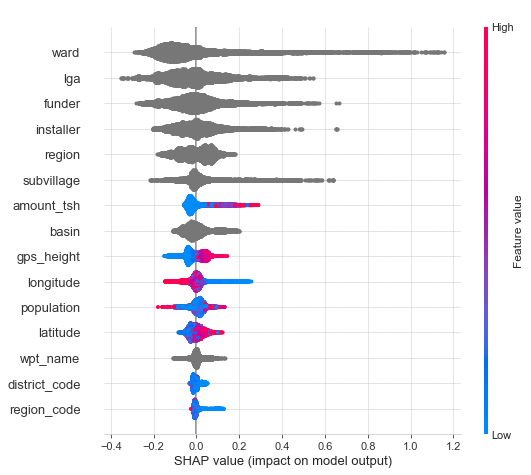

In [70]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_val)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_val)

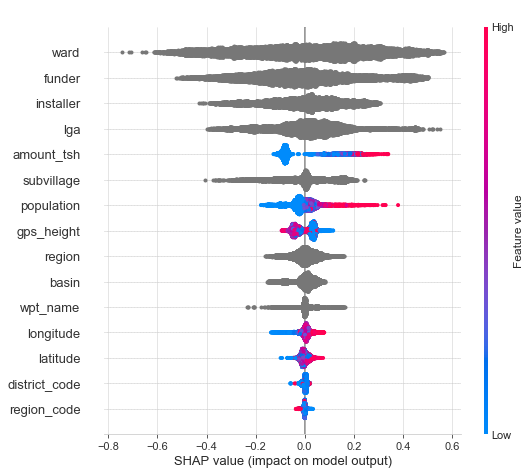

In [73]:
shap.summary_plot(shap_values[0], X_val)

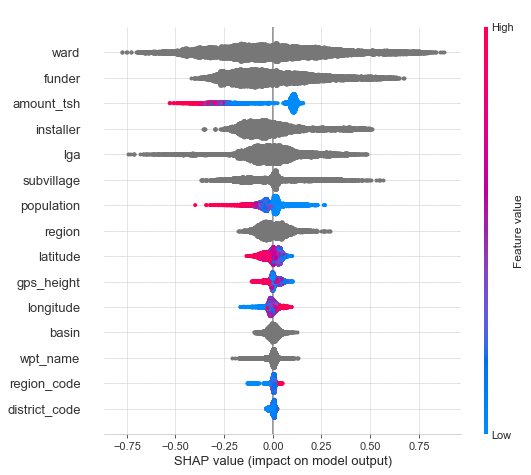

In [74]:
shap.summary_plot(shap_values[2], X_val)

In [71]:
df_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population'],
      dtype='object')

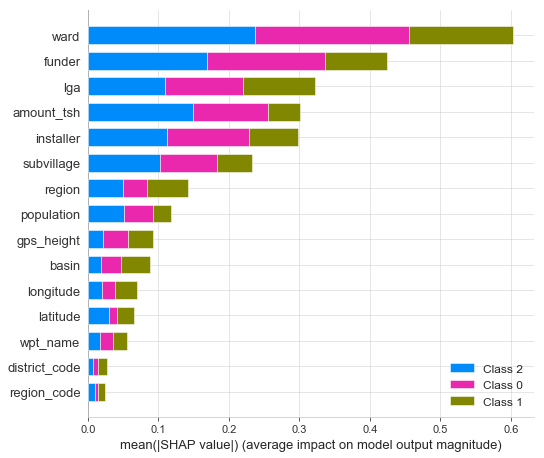

In [72]:
shap.summary_plot(shap_values, X_val)

In [ ]:
amount_tsh - Seems Important
date_recorded - Needs splits
funder - Need more analysis - Binning can be used - Looks important
gps_height - 
installer - Organization that installed the well
longitude - GPS coordinate
latitude - GPS coordinate
wpt_name - Name of the waterpoint if there is one
num_private -
basin - Geographic water basin
subvillage - Geographic location
region - Geographic location
region_code - Geographic location (coded)
district_code - Geographic location (coded)
lga - Geographic location
ward - Geographic location

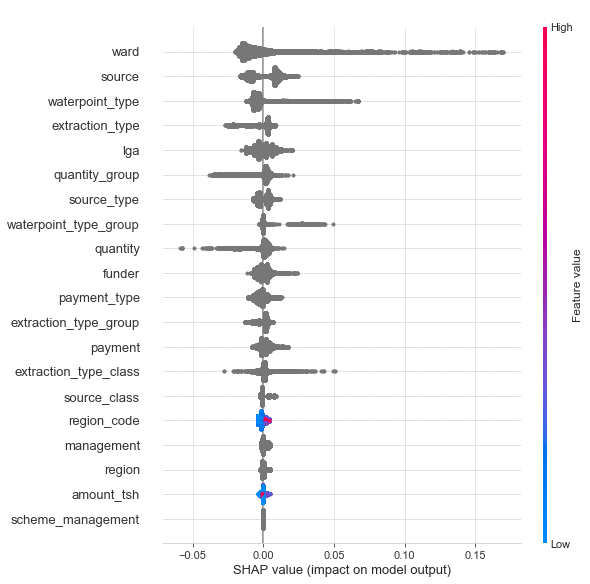

In [39]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_val)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_val)

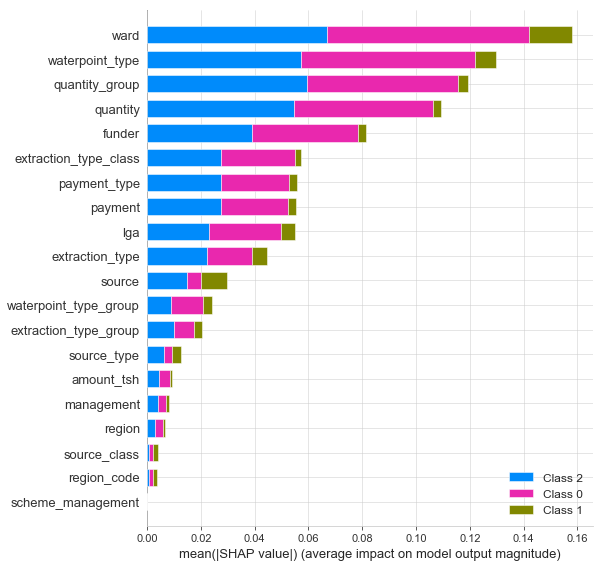

In [41]:
shap.summary_plot(shap_values, X_val)

In [27]:
# from catboost import CatBoostClassifier
# rf_classifier =CatBoostClassifier(iterations=2,
#                            depth=2,
#                            learning_rate=1,
#                            loss_function='Logloss',
#                            verbose=True)

# rf_classifier.fit(X_train, y_train)
# rf_predictions = rf_classifier.predict(X_test)
# accuracy_score(y_test, rf_predictions)

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=RANDOM_STATE,n_jobs=5)
xgb_es = xgb.XGBClassifier()
numeric_preprocessing_steps = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinalEncode', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps,numeric_cols),
        ("categorical", categorical_transformer,object_cols),
    ])

pipe  = Pipeline([
            ("preprocessor", preprocessor),
            ('clf', rf_classifier)
             ] ) 
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   MinMaxScaler())]),
                                                  array(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'sc...
       'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype=object)),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalEncode',
                                                                   OneHotEncoder())]),
                                                  array([], dtype=object))])),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=5,
                                        random_state=27))])

In [51]:
%%time

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test) 
print('Confusion matrix\n',confusion_matrix(y_test, pred))    
print('Accuracy', accuracy_score(y_test, pred)) 

Confusion matrix
 [[6169   17  266]
 [ 699   81   83]
 [1783   11 2771]]
Accuracy 0.7593434343434343
Wall time: 1.35 s


## Validation test and evaluation

In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.neural_network import MLPClassifier
# clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=200, random_state=1)
# clf3 = RandomForestClassifier(n_estimators=200, random_state=1)
# rf_classifier = clf3

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# resampled_X_train, resampled_y_train = sm.fit_resample(X_train, y_train)
# rf_classifier.fit(resampled_X_train, resampled_y_train)
# rf_predictions = rf_classifier.predict(X_test)
# accuracy_score(y_test, rf_predictions)

In [ ]:
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, rf_predictions)

In [ ]:
accuracy_score(y_test, rf_predictions) # RF

## Testing and Submission

In [ ]:
# df_test_transformed = encoder.transform(test_features_df)
test_probas = rf_classifier.predict(test_features)
test_probas

In [ ]:
submission_df = pd.read_csv("SubmissionFormat.csv", index_col="id")

In [ ]:
submission_df.head()

In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["status_group"] = test_probas

submission_df.head()

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)